In [27]:
import numpy as np
file = open("./test.csv")
csvFile = np.loadtxt(file, delimiter=",", skiprows=0)
n = csvFile.shape[0]
A = np.ones((n,2))
A[:,0] = csvFile[:,0]
B = csvFile[:,1]

M = csvFile[:,0:2]
R = np.corrcoef(M, rowvar = False)[0,1]
print("R^2:",R*R)

Q, R = np.linalg.qr(A, mode='complete')
QTB = (Q.T.dot(B))
B0 =QTB[1]/R[1,1]
B1 = (QTB[0]-R[0,1]*B0)/R[0,0]
print("B0:",B0)
print("B1:",B1)

R^2: 0.7957701007681287
B0: 2.8684546884631286
B1: -0.681574135433423


In [28]:
# Get 50 pts
import random
nRange=range(0,n)
indexes = random.choices(nRange,k=50)

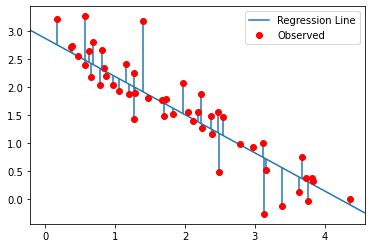

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.axline((0, B0), slope=B1, color='C0', label='Regression Line')
for index in indexes:
    val = (B1*csvFile[index][0])+B0
    plt.vlines(x=csvFile[index][0], ymin=val,ymax=csvFile[index][1])
    if index==indexes[0]:
        plt.plot(csvFile[index][0], csvFile[index][1], 'ro', label='Observed')
    else:
        plt.plot(csvFile[index][0], csvFile[index][1], 'ro')
ax.legend()
ax.axis('auto')
ax.set_autoscale_on(True)
plt.show()